In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
iris = load_iris()

In [14]:
x = iris.data
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation="softmax")
])

NameError: name 'train_size' is not defined

In [31]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Train on 105 samples
Epoch 1/100
105/105 [==============================] - 1s 7ms/sample - loss: 1.0195 - accuracy: 0.4667
Epoch 2/100
105/105 [==============================] - 0s 535us/sample - loss: 0.7295 - accuracy: 0.6381
Epoch 3/100
105/105 [==============================] - 0s 529us/sample - loss: 0.5050 - accuracy: 0.7524
Epoch 4/100
105/105 [==============================] - 0s 520us/sample - loss: 0.4868 - accuracy: 0.7619
Epoch 5/100
105/105 [==============================] - 0s 533us/sample - loss: 0.4770 - accuracy: 0.7524
Epoch 6/100
105/105 [==============================] - 0s 524us/sample - loss: 0.3843 - accuracy: 0.8000
Epoch 7/100
105/105 [==============================] - 0s 557us/sample - loss: 0.3375 - accuracy: 0.8190
Epoch 8/100
105/105 [==============================] - 0s 523us/sample - loss: 0.3120 - accuracy: 0.8667
Epoch 9/100
105/105 [==============================] - 0s 518us/sample - loss: 0.2855 - accuracy: 0.8762
Epoch 10/100
105/105 [==============

105/105 [==============================] - 0s 661us/sample - loss: 0.0856 - accuracy: 0.9810
Epoch 79/100
105/105 [==============================] - 0s 737us/sample - loss: 0.0746 - accuracy: 0.9714
Epoch 80/100
105/105 [==============================] - 0s 717us/sample - loss: 0.1733 - accuracy: 0.9238
Epoch 81/100
105/105 [==============================] - 0s 753us/sample - loss: 0.0835 - accuracy: 0.9619
Epoch 82/100
105/105 [==============================] - 0s 704us/sample - loss: 0.0971 - accuracy: 0.9619
Epoch 83/100
105/105 [==============================] - 0s 727us/sample - loss: 0.1080 - accuracy: 0.9429
Epoch 84/100
105/105 [==============================] - 0s 709us/sample - loss: 0.0980 - accuracy: 0.9524
Epoch 85/100
105/105 [==============================] - 0s 702us/sample - loss: 0.1408 - accuracy: 0.9429
Epoch 86/100
105/105 [==============================] - 0s 763us/sample - loss: 0.1391 - accuracy: 0.9619
Epoch 87/100
105/105 [==============================] - 0s 

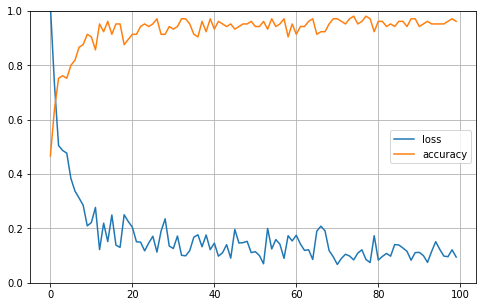

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
results = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 3ms/sample - loss: 0.0386 - accuracy: 0.9778


In [41]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.038597
Final test set accuracy: 0.977778


In [45]:
class_names = iris.target_names

In [46]:
X_new = X_test[:5]

In [47]:
y_pred = model.predict_classes(X_new)
print(np.array(class_names)[y_pred])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [48]:
y_new = y_test[:5]
print(np.array(class_names)[y_new])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
